# Exploratory data analysis for crimes in Canada from the year 2000 to 2020.

In this notebook, we perform the exploratory data analysis on the dataset containing crimes in different provinces of Canada from the year 2000 to 2020. The source of data is **Statistics Canada** table number 35-10-0177-01, release on 2021-07-27.

Import packages.

In [1]:
import os
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
t0 = time.time()

Import data.

In [3]:
path = os.getcwd()
data_init = pd.read_excel(path + "/clean_crime_canada_dataset.xlsx")
data_init

,year,location,type_of_crime,incidents,rate_per_100k
0,2000,Alberta,Attempted murder,35,1.16
1,2000,Alberta,Counterfeiting,137,4.56
2,2000,Alberta,Drug violations,6979,232.25
3,2000,Alberta,Firearms related crime,203,6.76
4,2000,Alberta,Fraud,11800,392.69
...,...,...,...,...,...
4659,2020,Yukon,Sexual violations against children,27,64.21
4660,2020,Yukon,"Theft over $5,000",29,68.96
4661,2020,Yukon,"Theft under $5,000",782,1859.60
4662,2020,Yukon,Trespass,8,19.02


In [4]:
data_init.year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [5]:
print("The data set contains crimes happened from the year", data_init.year.unique()[0],"to", data_init.year.unique()[len(data_init.year.unique())-1])

The data set contains crimes happened from the year 2000 to 2020


In [6]:
data_init.dtypes

year               int64
location          object
type_of_crime     object
incidents          int64
rate_per_100k    float64
dtype: object

Change **year** column to string type.

In [7]:
data_init['year'] = data_init['year'].apply(lambda x: str(x))

Remove whitespace.

In [8]:
# data_init['location'] = data_init['location'].str.replace(' ', '')
data_init['location'] = data_init['location'].apply(lambda x: x.rstrip())

In [9]:
data_init.dtypes

year              object
location          object
type_of_crime     object
incidents          int64
rate_per_100k    float64
dtype: object

In [10]:
data_init.location.unique()

array(['Alberta', 'British Columbia', 'Manitoba', 'New Brunswick',
       'Newfoundland and Labrador', 'Northwest Territories',
       'Nova Scotia', 'Nunavut', 'Ontario', 'Prince Edward Island',
       'Quebec', 'Saskatchewan', 'Yukon'], dtype=object)

In [11]:
print("There are a total of",len(data_init.location.unique()),"provinces in Canada.")

There are a total of 13 provinces in Canada.


Below we check the different categories of crimes in the data.

In [12]:
pd.DataFrame(data_init.type_of_crime.unique(), columns = ["Crime"])

,Crime
0,Attempted murder
1,Counterfeiting
2,Drug violations
3,Firearms related crime
4,Fraud
5,Homicide
6,Impaired driving
7,Motor vehicle theft
8,Prostitution
9,Robbery


In [13]:
print("There are",len(data_init.type_of_crime.unique()),"categories of crimes in the data set.")

There are 18 categories of crimes in the data set.


## Distribution of number of crimes relative to the crime category from the year 2000 to 2020.

Category wise total crimes in Canada.

In [14]:
total_crimes = data_init.groupby(by = ['type_of_crime'], as_index = False)['incidents'].sum().sort_values(by = 'incidents', ascending = False)
total_crimes.reset_index(inplace = True)
total_crimes.drop(columns = 'index', inplace = True)
total_crimes.style.set_caption("Total crimes in Canada from the year 2000 to 2020.")
total_crimes.rename(columns = {'type_of_crime' : 'Crime'}, inplace = True)
total_crimes

,Crime,incidents
0,"Theft under $5,000",11808215
1,Motor vehicle theft,2426849
2,Fraud,2039657
3,Drug violations,2003269
4,Impaired driving,1666504
5,Robbery,584867
6,"Theft over $5,000",367422
7,Weapons violations,318966
8,Sexual violations against children,75836
9,Trespass,68410


Exclude the category **Theft under $5,000** from the data set.

In [15]:
data = data_init[data_init.type_of_crime != "Theft under $5,000"]
data.shape

(4391, 5)

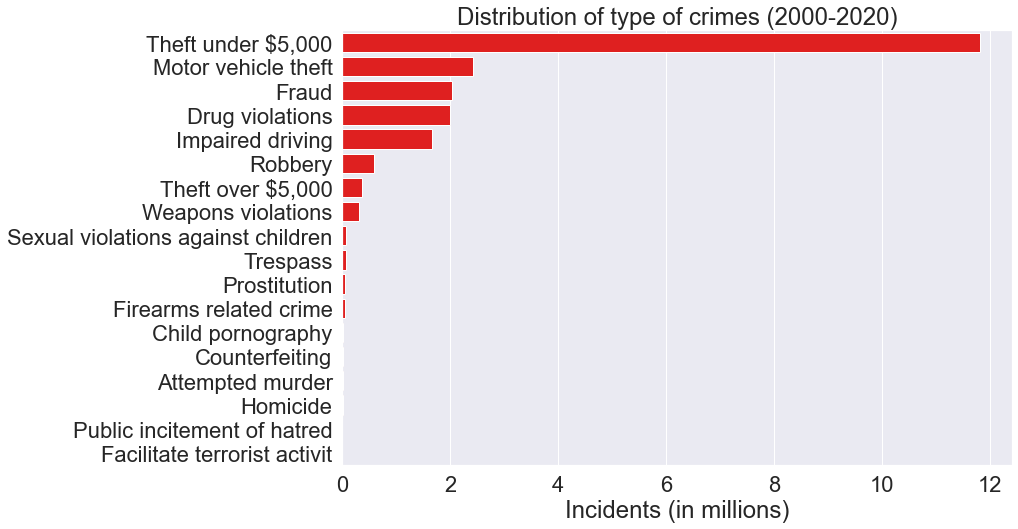

In [16]:
total_crimes = data_init.groupby(by = ['type_of_crime'], as_index = False)['incidents'].sum().sort_values(by = 'incidents', ascending = False)
total_crimes.reset_index(inplace = True)
total_crimes.drop(columns = 'index', inplace = True)
sns.set(font_scale = 2)
plt.figure(figsize = (12,8))
sns.barplot(x = total_crimes.incidents/1000000, y = total_crimes.type_of_crime, color = 'red')
plt.ylabel('')
plt.xlabel('Incidents (in millions)')
plt.ticklabel_format(style='plain', axis='x')
plt.title('Distribution of type of crimes (2000-2020)');

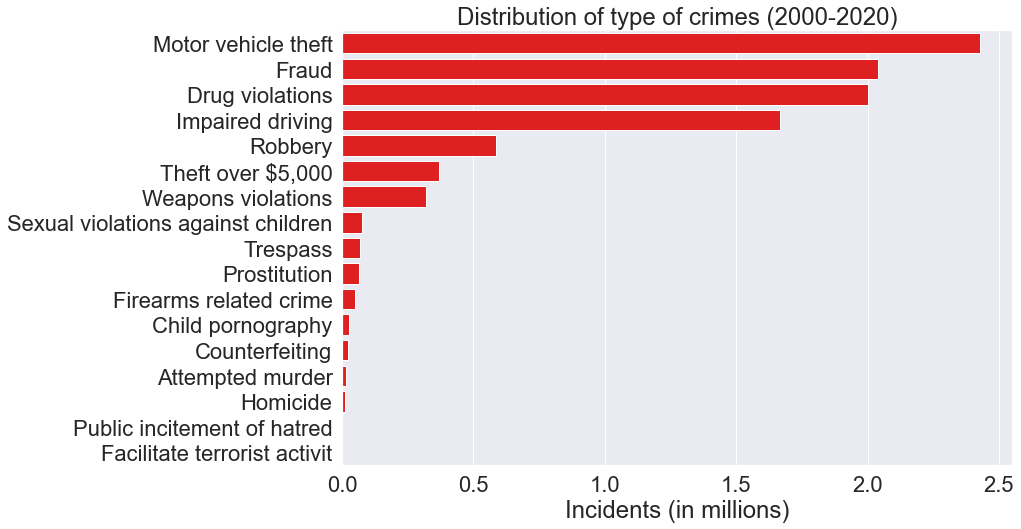

In [17]:
total_crimes = data.groupby(by = ['type_of_crime'], as_index = False)['incidents'].sum().sort_values(by = 'incidents', ascending = False)
total_crimes.reset_index(inplace = True)
total_crimes.drop(columns = 'index', inplace = True)
sns.set(font_scale = 2)
plt.figure(figsize = (12,8))
sns.barplot(x = total_crimes.incidents/1000000, y = total_crimes.type_of_crime, color = 'red')
plt.ylabel('')
plt.xlabel('Incidents (in millions)')
plt.ticklabel_format(style='plain', axis='x')
plt.title('Distribution of type of crimes (2000-2020)');

### Distribution of crime rate per 100k population in Canada relative to the crime category.

In [18]:
total_crime_rate = data.groupby(by = ['type_of_crime'], as_index = False)['rate_per_100k'].mean().sort_values(by = 'rate_per_100k', ascending = False)
total_crime_rate.reset_index(inplace = True)
total_crime_rate.drop(columns = 'index', inplace = True)
total_crime_rate.style.set_caption("Average crime rate per 100k population in Canada from the year 2000 to 2020.")
total_crime_rate.rename(columns = {'type_of_crime' : 'Crime'}, inplace = True)
total_crime_rate.round(2)

,Crime,rate_per_100k
0,Impaired driving,521.52
1,Drug violations,390.48
2,Motor vehicle theft,383.44
3,Fraud,300.70
4,Weapons violations,70.02
5,Robbery,68.77
6,"Theft over $5,000",50.11
7,Sexual violations against children,22.03
8,Trespass,16.95
9,Firearms related crime,14.76


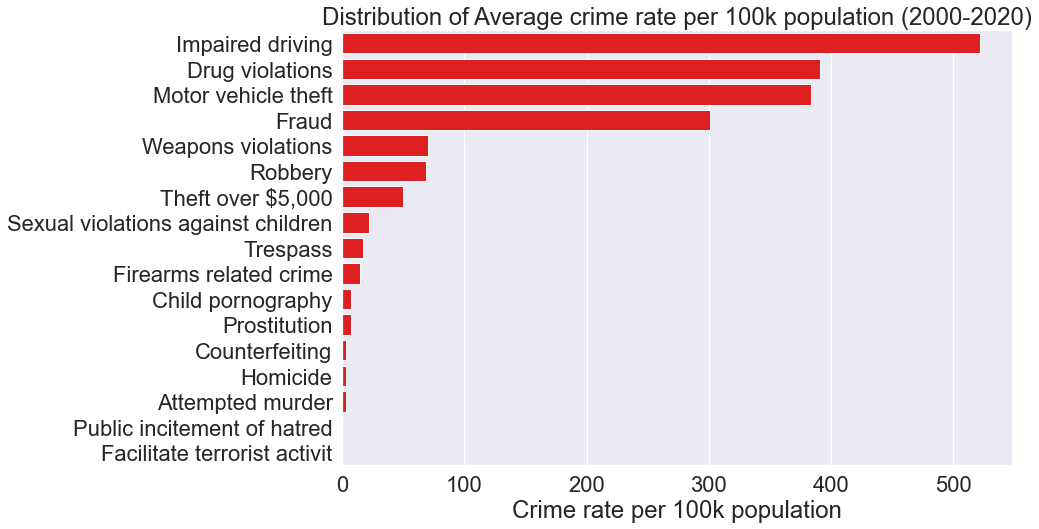

In [19]:
sns.set(font_scale = 2)
plt.figure(figsize = (12,8)) 
sns.barplot(x = total_crime_rate.rate_per_100k, y = total_crime_rate.Crime, color = 'red')
plt.ylabel('')
plt.xlabel('Crime rate per 100k population')
plt.title('Distribution of Average crime rate per 100k population (2000-2020)');

#### Variation of total crimes in Canada over the years. 

In [20]:
crime_year = data.groupby(by = 'year', as_index = False)['incidents'].sum()
crime_year

,year,incidents
0,2000,492644
1,2001,505836
2,2002,505004
3,2003,513320
4,2004,524985
5,2005,508032
6,2006,505660
7,2007,494455
8,2008,480347
9,2009,461086


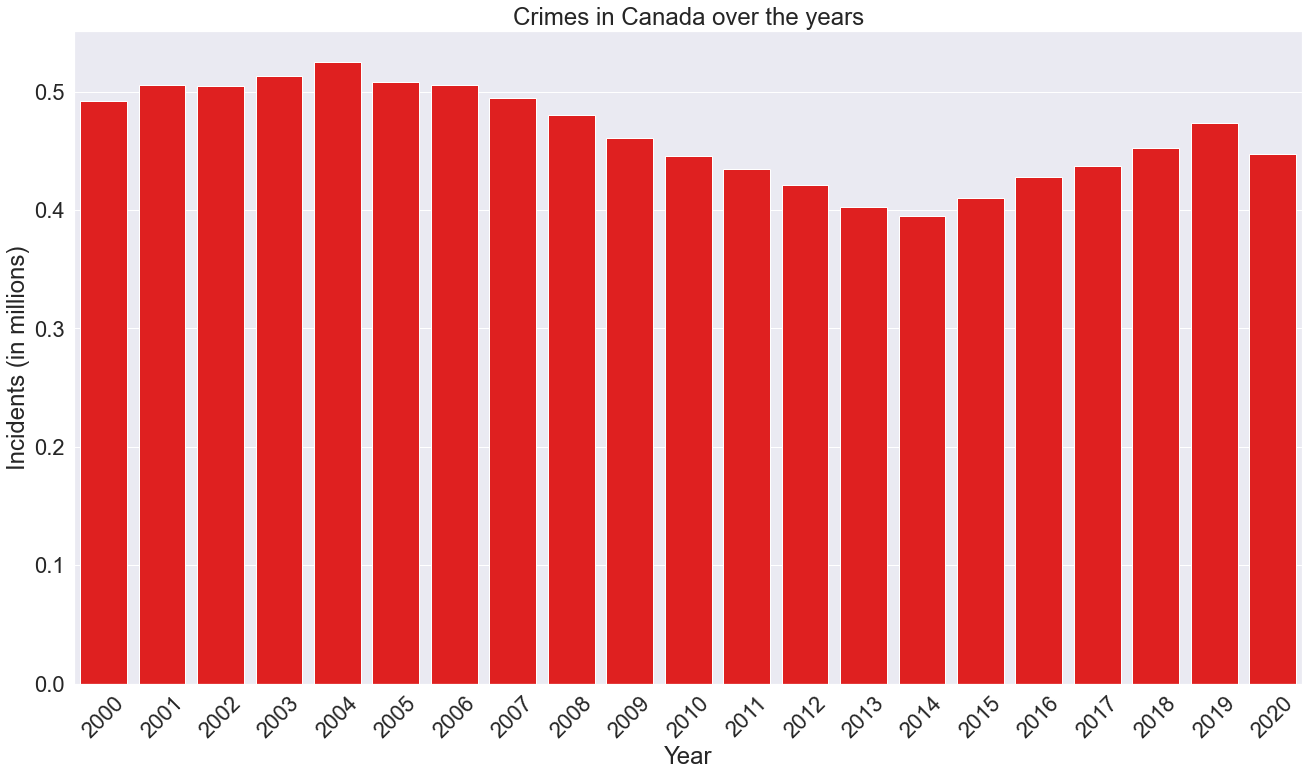

In [21]:
sns.set(font_scale = 2)
plt.figure(figsize= (22,12))
sns.barplot(x = crime_year.year, y = crime_year.incidents/1000000, color = 'red')
plt.xlabel('Year')
plt.ylabel('Incidents (in millions)')
plt.xticks(rotation = 45)
plt.title('Crimes in Canada over the years');

#### Total number of crimes in provinces from the year 2000 to 2020. 

In [22]:
crime_province = data.groupby(by = 'location', as_index = False)['incidents'].sum()
crime_province.sort_values(by = 'incidents', ascending = False, inplace = True)
crime_province.reset_index(inplace = True)
crime_province.drop(columns = 'index', inplace = True)
crime_province

,location,incidents
0,Ontario,2854020
1,Quebec,1978474
2,British Columbia,1875612
3,Alberta,1433195
4,Saskatchewan,491842
5,Manitoba,458827
6,Nova Scotia,246516
7,New Brunswick,188103
8,Newfoundland and Labrador,105239
9,Northwest Territories,36650


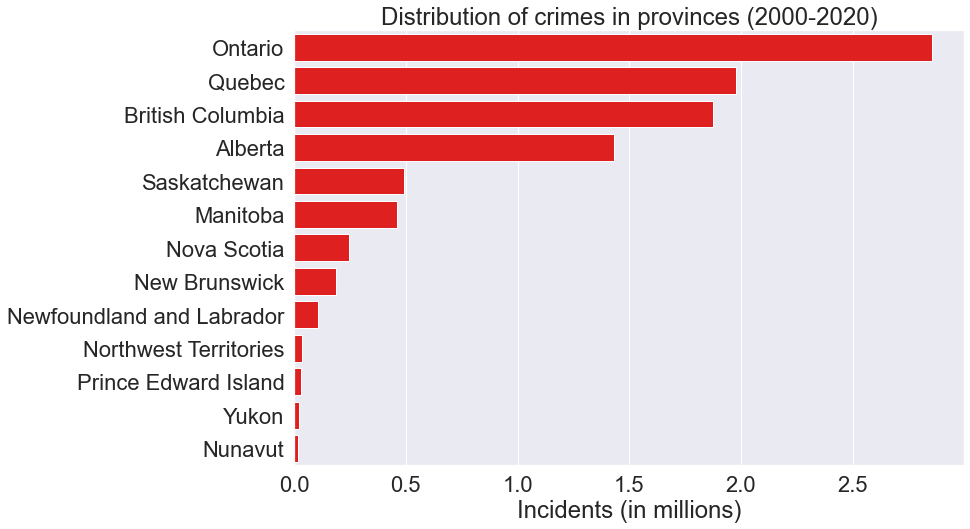

In [23]:
sns.set(font_scale = 2)
plt.figure(figsize = (12,8))
sns.barplot(y = crime_province.location, x = crime_province.incidents/1000000, color = 'red')
plt.ylabel('')
plt.xlabel('Incidents (in millions)')
plt.title('Distribution of crimes in provinces (2000-2020)');

##### Variation in average crime rate per 100k population in provinces from the year 2000 to 2020. 

In [24]:
crime_province_rate = data.groupby(by = 'location', as_index = False)['rate_per_100k'].mean()
crime_province_rate.sort_values(by = 'rate_per_100k', ascending = False, inplace = True)
crime_province_rate.reset_index(inplace = True)
crime_province_rate.drop(columns = 'index', inplace = True)
crime_province_rate.round(2)

,location,rate_per_100k
0,Northwest Territories,248.82
1,Yukon,181.96
2,Nunavut,167.43
3,Saskatchewan,136.83
4,British Columbia,124.58
5,Alberta,114.20
6,Manitoba,110.44
7,Nova Scotia,77.34
8,Quebec,74.68
9,New Brunswick,73.56


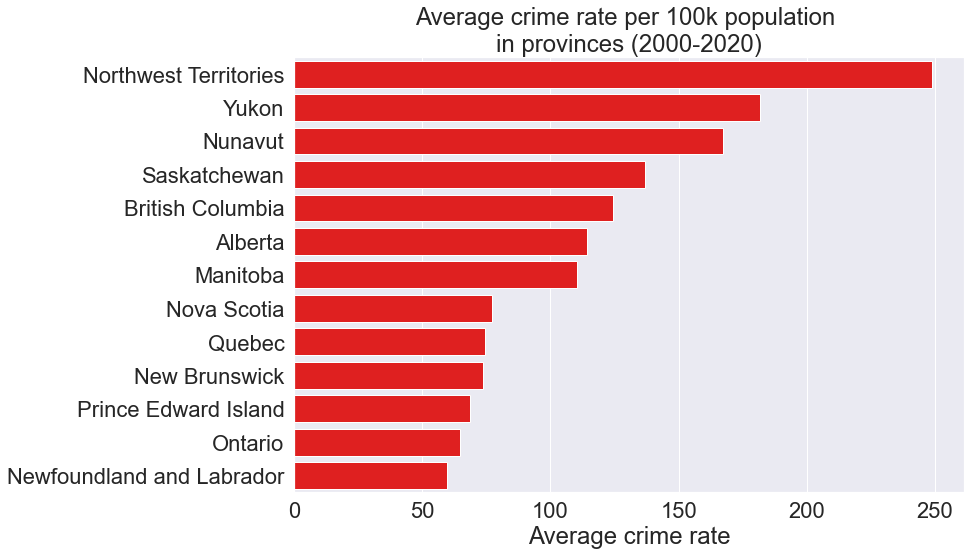

In [25]:
sns.set(font_scale = 2)
plt.figure(figsize = (12,8))
sns.barplot(y = crime_province_rate.location, x = crime_province_rate.rate_per_100k, color = 'red')
plt.ylabel('')
plt.xlabel('Average crime rate')
plt.title('Average crime rate per 100k population \nin provinces (2000-2020)');

##### Heatmaps for the crimes in Canada and its provinces over the years from 2000 to 2020..

In [26]:
def heatmap_crime_data(df, groupby_columns, pivot_index, pivot_column):
    data_heat = df.groupby(by = groupby_columns)['incidents'].sum()
    data_heat = data_heat.to_frame()
    data_heat.reset_index(inplace = True)
    data_heat_pivot = data_heat.pivot(index = pivot_index, columns = pivot_column, values = 'incidents')
    data_heat_pivot.fillna(0, inplace = True)
    return data_heat_pivot

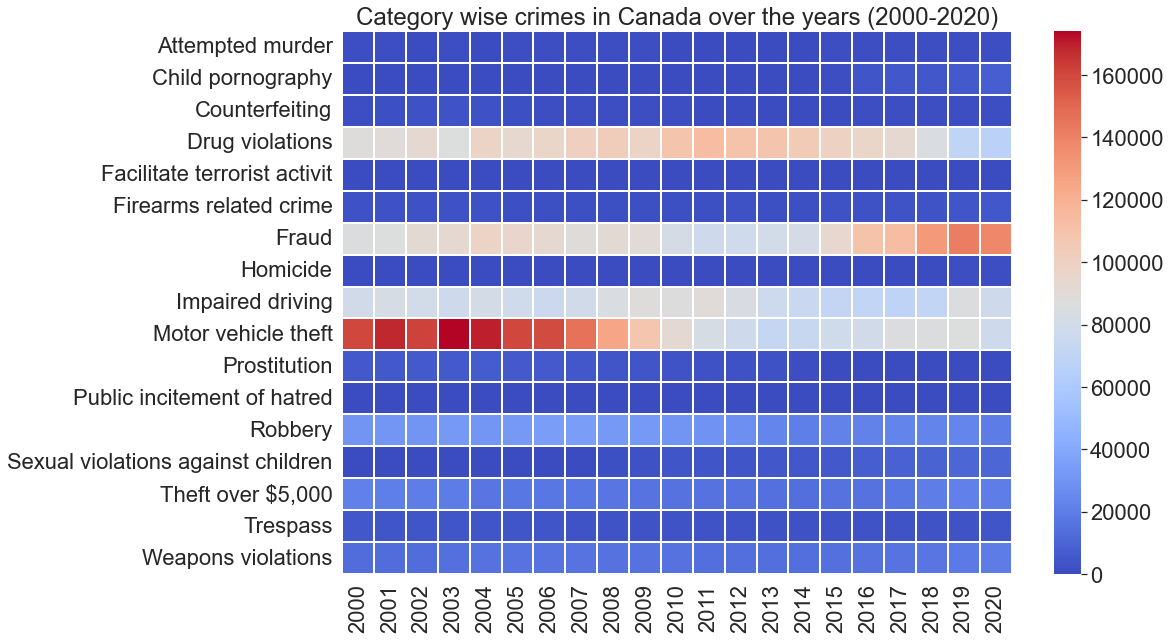

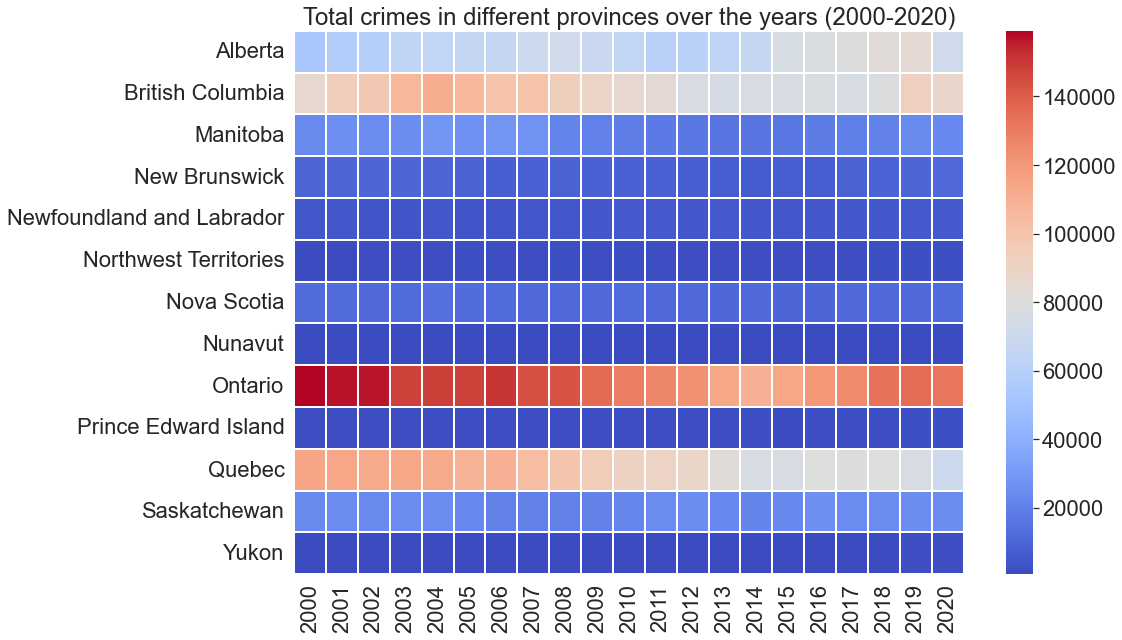

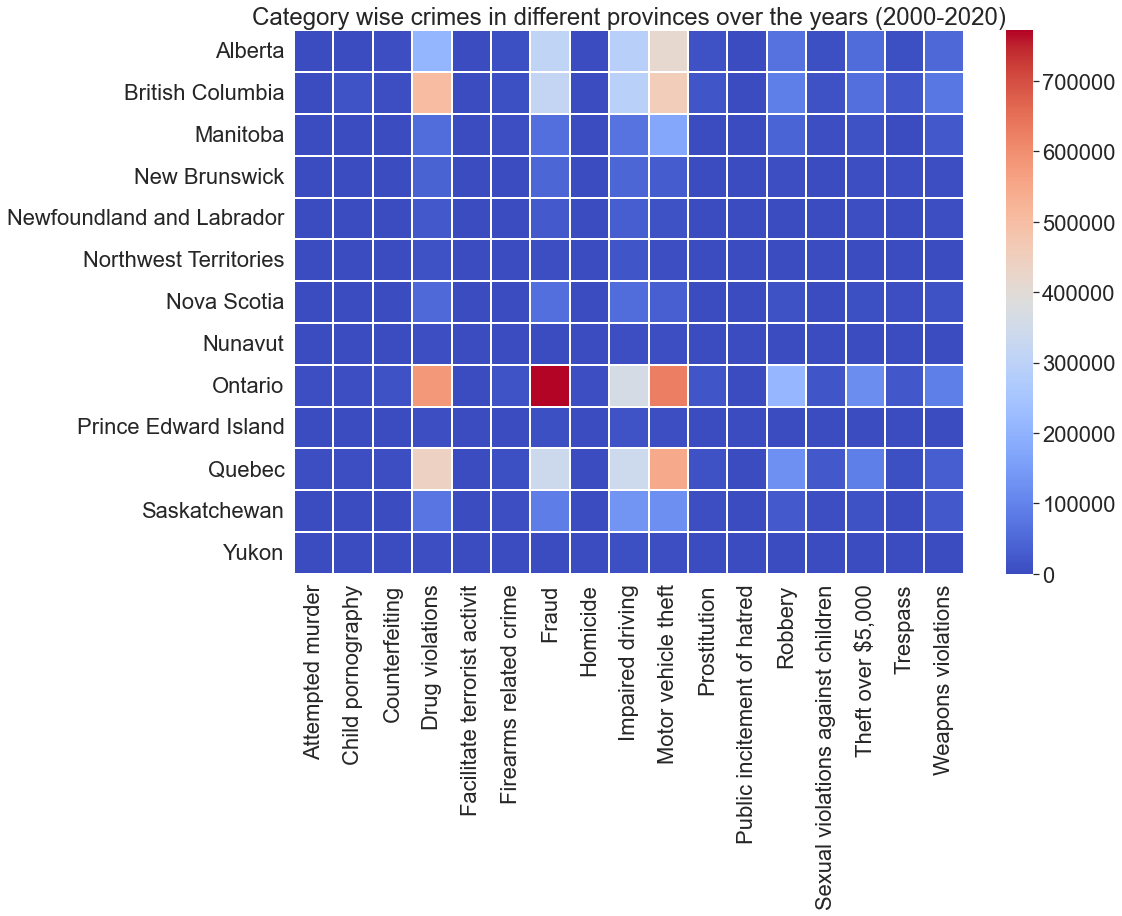

In [27]:
size = (15, 10)
font_size = 2
a = heatmap_crime_data(
    df = data,
    groupby_columns = ['type_of_crime', 'year'],
    pivot_index = ['type_of_crime'],
    pivot_column = ['year']
)
sns.set(font_scale = font_size)
plt.figure(figsize = size)
sns.heatmap(a, cmap="coolwarm", linewidths = 2)
plt.xlabel('')
plt.ylabel('')
plt.title('Category wise crimes in Canada over the years (2000-2020)');

b = heatmap_crime_data(
    df = data,
    groupby_columns = ['year', 'location'],
    pivot_index = ['location'],
    pivot_column = ['year']
)
sns.set(font_scale = font_size)
plt.figure(figsize = size)
sns.heatmap(b, cmap="coolwarm", linewidths = 2)
plt.xlabel('')
plt.ylabel('')
plt.title('Total crimes in different provinces over the years (2000-2020)');

c = heatmap_crime_data(
    df = data,
    groupby_columns = ['type_of_crime', 'location'],
    pivot_index = ['location'],
    pivot_column = ['type_of_crime']
)
sns.set(font_scale = font_size)
plt.figure(figsize = size)
sns.heatmap(c, cmap="coolwarm", linewidths = 2)
plt.xlabel('')
plt.ylabel('')
plt.title('Category wise crimes in different provinces over the years (2000-2020)');

Table summarizing total crimes in provinces over the years from 2000 to 2020.

In [28]:
pd.set_option('display.max_columns', None)
b

year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
location,,,,,,,,,,,,,,,,,,,,,
Alberta,53348,58203,59368,64024,65149,65878,66555,69544,72185,68545,65097,60939,60669,63327,66732,76072,77883,80305,82387,84662,72323
British Columbia,85668,93837,97428,107110,111384,106342,100722,100470,93154,89780,86327,84263,77200,75281,76568,76492,78026,76538,78895,92605,87522
Manitoba,24085,26016,24395,25116,28116,26167,28216,26872,21213,20229,18937,17607,16954,16094,15670,16560,18421,19582,21073,24031,23473
New Brunswick,10459,10461,10179,10033,10472,9083,8045,8246,8794,8482,8575,8099,7952,7432,6807,7371,7297,8952,9865,10273,11226
Newfoundland and Labrador,4595,4525,4178,4043,4583,4261,3864,4515,4771,5135,6222,5850,5498,5636,5115,4847,5194,5092,5141,6187,5987
Northwest Territories,1014,1238,1444,1661,1771,1905,1716,1754,2054,1760,2066,1848,1759,1462,1504,1625,1598,1884,1904,2395,2288
Nova Scotia,12275,12152,11676,12181,13734,12507,12234,11505,11686,11543,12062,11785,11230,11143,11260,10444,10482,11635,11685,11447,11850
Nunavut,697,806,765,863,847,809,811,848,866,942,958,910,1108,952,751,794,857,901,925,1169,1231
Ontario,159184,157110,156118,147681,148428,147744,150726,144147,142752,136146,129811,126554,123010,113746,110155,114190,120462,125151,133374,135122,132409


##### Heatmaps for the crime rate in Canada and its provinces over the years from 2000 to 2020..

In [29]:
def heatmap_rate_data(df, groupby_columns, pivot_index, pivot_column):
    data_heat = df.groupby(by = groupby_columns)['rate_per_100k'].mean()
    data_heat = data_heat.to_frame()
    data_heat.reset_index(inplace = True)
    data_heat_pivot = data_heat.pivot(index = pivot_index, columns = pivot_column, values = 'rate_per_100k')
    data_heat_pivot.fillna(0, inplace = True)
    return data_heat_pivot

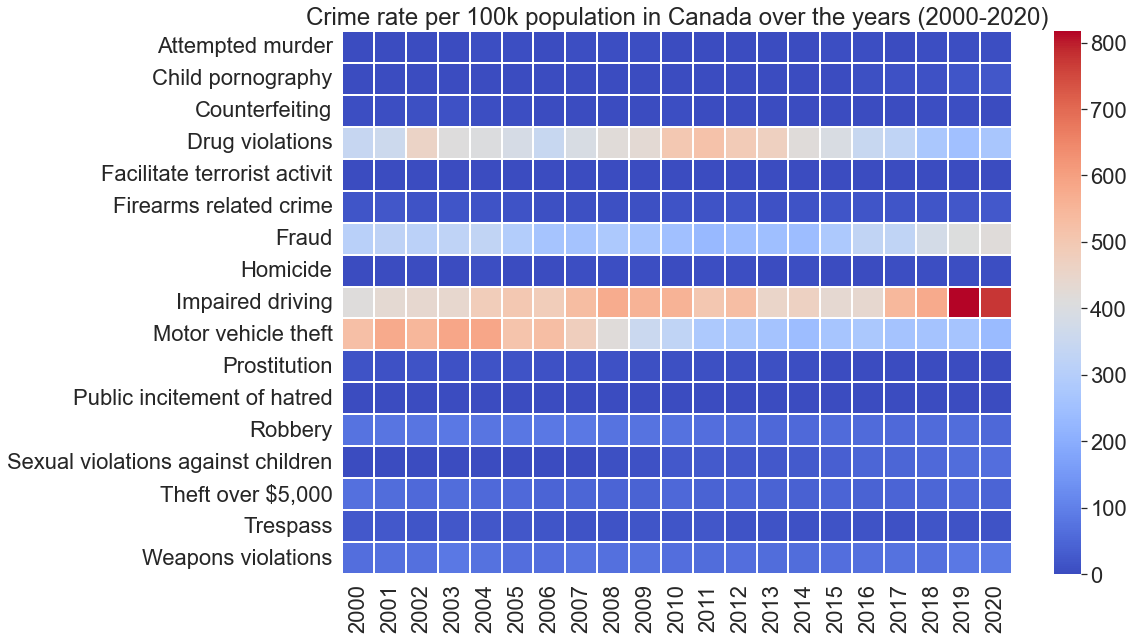

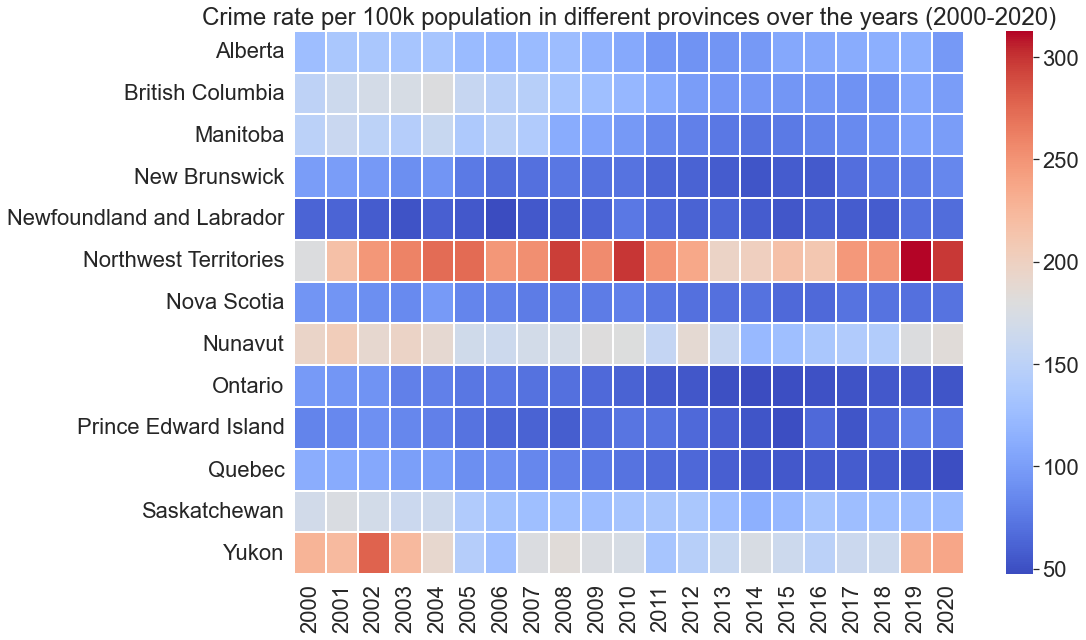

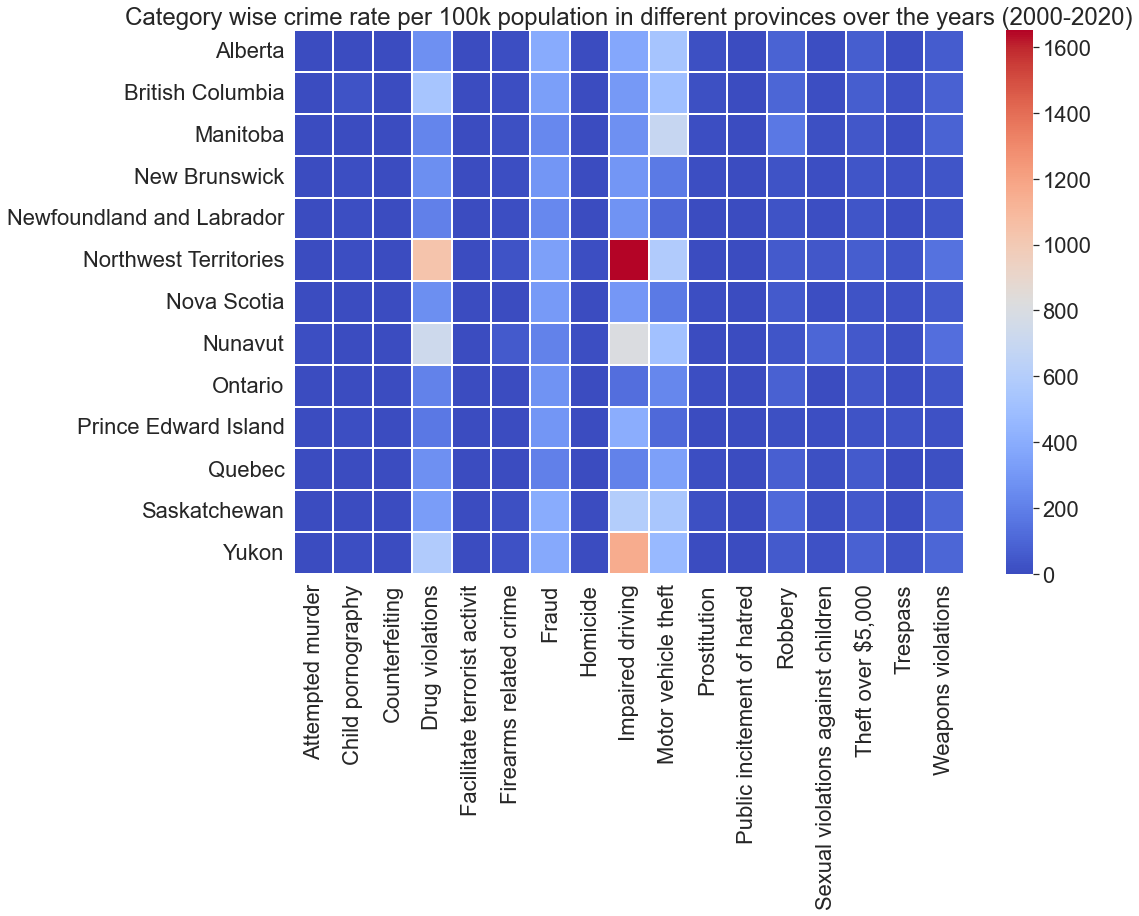

In [30]:
size = (15, 10)
font_size = 2
d = heatmap_rate_data(
    df = data,
    groupby_columns = ['type_of_crime', 'year'],
    pivot_index = ['type_of_crime'],
    pivot_column = ['year']
)
sns.set(font_scale = font_size)
plt.figure(figsize = size)
sns.heatmap(d, cmap="coolwarm", linewidths = 2)
plt.xlabel('')
plt.ylabel('')
plt.title('Crime rate per 100k population in Canada over the years (2000-2020)');

e = heatmap_rate_data(
    df = data,
    groupby_columns = ['year', 'location'],
    pivot_index = ['location'],
    pivot_column = ['year']
)
sns.set(font_scale = font_size)
plt.figure(figsize = size)
sns.heatmap(e, cmap="coolwarm", linewidths = 2)
plt.xlabel('')
plt.ylabel('')
plt.title('Crime rate per 100k population in different provinces over the years (2000-2020)');

f = heatmap_rate_data(
    df = data,
    groupby_columns = ['type_of_crime', 'location'],
    pivot_index = ['location'],
    pivot_column = ['type_of_crime']
)
sns.set(font_scale = font_size)
plt.figure(figsize = size)
sns.heatmap(f, cmap="coolwarm", linewidths = 2)
plt.xlabel('')
plt.ylabel('')
plt.title('Category wise crime rate per 100k population in different provinces over the years (2000-2020)');

Table summarizing crime rates per 100k population in provinces over the years from 2000 to 2020.

In [31]:
pd.set_option('display.max_columns', None)
e.round(2)

year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
location,,,,,,,,,,,,,,,,,,,,,
Alberta,126.81,135.95,135.55,134.08,134.07,123.94,121.58,123.69,125.47,116.44,109.00,94.61,92.11,93.57,96.12,107.97,109.18,111.38,112.75,114.18,96.21
British Columbia,151.49,164.43,169.81,173.22,178.71,158.37,148.41,146.34,133.86,127.22,120.81,110.10,99.44,95.64,95.68,94.20,94.45,91.33,92.62,107.00,100.01
Manitoba,149.94,161.39,150.66,143.87,159.72,138.80,149.00,141.21,110.69,104.61,96.94,83.95,79.79,74.86,72.07,75.38,82.46,86.30,91.63,103.22,100.11
New Brunswick,99.54,99.66,97.03,89.26,93.16,75.90,67.44,69.14,73.59,70.69,71.17,63.04,61.68,57.63,52.76,57.14,56.23,68.69,75.33,77.79,84.50
Newfoundland and Labrador,62.16,61.92,57.44,51.98,59.05,55.23,47.30,55.44,58.29,62.11,74.50,65.55,61.44,62.89,56.97,53.99,57.71,56.70,57.54,69.52,67.46
Northwest Territories,178.84,216.50,247.55,260.18,272.67,274.34,248.39,252.74,296.14,254.93,298.36,249.88,237.06,196.33,201.60,216.08,210.53,246.87,248.99,312.88,298.02
Nova Scotia,93.89,93.09,89.20,86.62,97.47,83.34,81.53,76.90,78.04,76.90,80.02,73.42,70.01,69.70,70.57,65.60,65.40,72.04,71.72,69.44,71.18
Nunavut,194.97,204.63,189.61,196.23,189.14,166.72,164.51,168.82,169.71,180.60,179.52,156.56,187.98,158.47,122.81,128.00,136.34,141.16,142.65,178.08,184.01
Ontario,97.30,94.33,92.23,80.42,79.86,73.70,74.40,70.58,69.26,65.47,61.77,56.14,54.04,49.52,47.58,49.00,51.07,52.32,54.83,54.65,52.86


In [32]:
data_init.location.unique()

array(['Alberta', 'British Columbia', 'Manitoba', 'New Brunswick',
       'Newfoundland and Labrador', 'Northwest Territories',
       'Nova Scotia', 'Nunavut', 'Ontario', 'Prince Edward Island',
       'Quebec', 'Saskatchewan', 'Yukon'], dtype=object)

In [33]:
frame_1 = data_init.groupby(by = ['type_of_crime'], as_index = False)['incidents'].sum()
frame_1 = ((frame_1.sort_values(by = 'incidents', ascending = False)).reset_index()).drop(columns = 'index')

frame_2 = data_init[(data_init.year == '2000')]
frame_2 = frame_2.groupby(by = ['type_of_crime'], as_index = False)['incidents'].sum()
frame_2 = frame_2[['type_of_crime', 'incidents']]
frame_2 = frame_2.rename(columns = {'incidents' : 'Incidents in year 2000'} )

frame_3 = data_init[(data_init.year == '2020')]
frame_3 = frame_3.groupby(by = ['type_of_crime'], as_index = False)['incidents'].sum()
frame_3 = frame_3[['type_of_crime', 'incidents']]
frame_3 = frame_3.rename(columns = {'incidents' : 'Incidents in year 2020'} )

frame_4 = data_init[(data_init.year == '2000')]
frame_4 = frame_4.groupby(by = ['type_of_crime'], as_index = False)['rate_per_100k'].mean()
frame_4 = frame_4.rename(columns = {'rate_per_100k' : 'Crime rate in 2000'})
frame_4 = frame_4[['type_of_crime', 'Crime rate in 2000']]

frame_5 = data_init[(data_init.year == '2020')]
frame_5 = frame_5.groupby(by = ['type_of_crime'], as_index = False)['rate_per_100k'].mean()
frame_5 = frame_5.rename(columns = {'rate_per_100k' : 'Crime rate in 2020'})
frame_5 = frame_5[['type_of_crime', 'Crime rate in 2020']]

result1 = pd.merge(frame_1, frame_2, on = 'type_of_crime', how = 'left' )
result2 = pd.merge(frame_3, frame_4, on = 'type_of_crime', how = 'left' )
result3 = pd.merge(result1, result2, on = 'type_of_crime' , how = 'left')
result4 = pd.merge(result3, frame_5, on = 'type_of_crime' , how = 'left')
result4.rename(columns = {
    'type_of_crime' : 'Crime',
    'incidents' : 'Total incidents (2000-2020)',
}, inplace = True)
result4.fillna(0, inplace = True)
result4['Change in crime rate from the year 2000 to 2020'] = result4['Crime rate in 2020']- result4['Crime rate in 2000']
result4.sort_values(by = ['Change in crime rate from the year 2000 to 2020'], ascending = False, inplace = True)
result4 = (result4.reset_index())
result4 = result4.drop(columns = ['index'])
result4.round(2)

,Crime,Total incidents (2000-2020),Incidents in year 2000,Incidents in year 2020,Crime rate in 2000,Crime rate in 2020,Change in crime rate from the year 2000 to 2020
0,Impaired driving,1666504,79225.0,77603,412.78,773.78,361.00
1,Fraud,2039657,85791.0,138011,309.44,415.37,105.93
2,Sexual violations against children,75836,0.0,10388,0.00,66.27,66.27
3,Weapons violations,318966,13003.0,19485,63.93,86.78,22.85
4,Child pornography,26238,0.0,7215,0.00,21.54,21.54
5,Firearms related crime,47437,2236.0,4137,18.50,22.39,3.89
6,Attempted murder,15730,767.0,864,1.69,3.62,1.93
7,Homicide,12641,546.0,743,2.99,3.45,0.46
8,Public incitement of hatred,755,0.0,112,0.00,0.38,0.38
9,Facilitate terrorist activit,102,0.0,4,0.00,0.00,0.00


In [34]:
provinces = data_init.location.unique()
output = [];
for province in provinces:
    
    frame_1 = data_init[data_init.location == province]
    frame_1 = frame_1.groupby(by = ['type_of_crime'], as_index = False)['incidents'].sum()
    frame_1 = ((frame_1.sort_values(by = 'incidents', ascending = False)).reset_index()).drop(columns = 'index')

    frame_2 = data_init[(data_init.location == province) & (data_init.year == '2000')]
    frame_2 = frame_2[['type_of_crime', 'incidents']]
    frame_2 = frame_2.rename(columns = {'incidents' : 'Incidents in year 2000'} )

    frame_3 = data_init[(data_init.location == province) & (data_init.year == '2020')]
    frame_3 = frame_3[['type_of_crime', 'incidents']]
    frame_3 = frame_3.rename(columns = {'incidents' : 'Incidents in year 2020'} )

    frame_4 = data_init[(data_init.location == province) & (data_init.year == '2000')]
    frame_4 = frame_4.rename(columns = {'rate_per_100k' : 'Crime rate in 2000'})
    frame_4 = frame_4[['type_of_crime', 'Crime rate in 2000']]

    frame_5 = data_init[(data_init.location == province) & (data_init.year == '2020')]
    frame_5 = frame_5.rename(columns = {'rate_per_100k' : 'Crime rate in 2020'})
    frame_5 = frame_5[['type_of_crime', 'Crime rate in 2020']]

    result1 = pd.merge(frame_1, frame_2, on = 'type_of_crime', how = 'left' )
    result2 = pd.merge(frame_3, frame_4, on = 'type_of_crime', how = 'left' )
    result3 = pd.merge(result1, result2, on = 'type_of_crime' , how = 'left')
    result4 = pd.merge(result3, frame_5, on = 'type_of_crime' , how = 'left')
    result4.rename(columns = {
        'type_of_crime' : 'Crime',
        'incidents' : 'Total incidents (2000-2020)',
    }, inplace = True)
    result4 = result4.fillna(0)
    result4['Change in crime rate from the year 2000 to 2020'] = result4['Crime rate in 2020']- result4['Crime rate in 2000']
    result4.sort_values(by = ['Change in crime rate from the year 2000 to 2020'], ascending = False, inplace = True)
    output.append(result4)

In [35]:
for i in range(0,len(data.location.unique())):
    print('Crime data for the province of', provinces[i])
    display(output[i])

Crime data for the province of Alberta


,Crime,Total incidents (2000-2020),Incidents in year 2000,Incidents in year 2020,Crime rate in 2000,Crime rate in 2020,Change in crime rate from the year 2000 to 2020
2,Fraud,308383,11800.0,20240,392.69,457.72,65.03
6,"Theft over $5,000",55114,1847.0,4140,61.47,93.63,32.16
9,Sexual violations against children,8808,0.0,1356,0.00,30.67,30.67
7,Weapons violations,48644,1415.0,3164,47.09,71.55,24.46
11,Firearms related crime,7365,203.0,752,6.76,17.01,10.25
14,Child pornography,1744,0.0,252,0.00,5.70,5.70
13,Homicide,1992,59.0,139,1.96,3.14,1.18
16,Public incitement of hatred,83,0.0,14,0.00,0.32,0.32
15,Attempted murder,1121,35.0,56,1.16,1.27,0.11
17,Facilitate terrorist activit,19,0.0,0,0.00,0.00,0.00


Crime data for the province of British Columbia


,Crime,Total incidents (2000-2020),Incidents in year 2000,Incidents in year 2020,Crime rate in 2000,Crime rate in 2020,Change in crime rate from the year 2000 to 2020
3,Fraud,318395,11764.0,20947,291.25,406.92,115.67
10,Child pornography,13508,0.0,4185,0.00,81.30,81.30
4,Impaired driving,290239,9362.0,15776,231.78,306.47,74.69
7,"Theft over $5,000",62642,2252.0,5351,55.75,103.95,48.20
11,Sexual violations against children,11176,0.0,1374,0.00,26.69,26.69
6,Weapons violations,77279,2838.0,4637,70.26,90.08,19.82
16,Public incitement of hatred,125,0.0,24,0.00,0.47,0.47
17,Facilitate terrorist activit,22,0.0,2,0.00,0.04,0.04
15,Homicide,2022,85.0,98,2.10,1.90,-0.20
14,Attempted murder,2080,91.0,102,2.25,1.98,-0.27


Crime data for the province of Manitoba


,Crime,Total incidents (2000-2020),Incidents in year 2000,Incidents in year 2020,Crime rate in 2000,Crime rate in 2020,Change in crime rate from the year 2000 to 2020
3,Fraud,62379,2473.0,5610,215.54,406.74,191.20
8,Sexual violations against children,4180,0.0,704,0.00,51.04,51.04
6,Weapons violations,23388,895.0,1777,78.00,128.84,50.84
2,Impaired driving,70420,3431.0,4669,299.03,338.51,39.48
13,Child pornography,763,0.0,309,0.00,22.40,22.40
9,Firearms related crime,3852,160.0,280,13.94,20.30,6.36
12,Homicide,1024,30.0,62,2.61,4.50,1.89
16,Public incitement of hatred,21,0.0,5,0.00,0.36,0.36
17,Facilitate terrorist activit,2,0.0,0,0.00,0.00,0.00
15,Attempted murder,592,21.0,19,1.83,1.38,-0.45


Crime data for the province of New Brunswick


,Crime,Total incidents (2000-2020),Incidents in year 2000,Incidents in year 2020,Crime rate in 2000,Crime rate in 2020,Change in crime rate from the year 2000 to 2020
1,Fraud,47110,2598.0,3984,346.16,509.80,163.64
12,Child pornography,672,0.0,217,0.00,27.77,27.77
9,Sexual violations against children,1956,0.0,213,0.00,27.26,27.26
6,Weapons violations,5467,296.0,399,39.44,51.06,11.62
10,Firearms related crime,1211,69.0,95,9.19,12.16,2.97
13,Counterfeiting,597,26.0,41,3.46,5.25,1.79
15,Attempted murder,191,3.0,10,0.40,1.28,0.88
14,Homicide,197,10.0,14,1.33,1.79,0.46
16,Public incitement of hatred,12,0.0,0,0.00,0.00,0.00
17,Facilitate terrorist activit,1,0.0,0,0.00,0.00,0.00


Crime data for the province of Newfoundland and Labrador


,Crime,Total incidents (2000-2020),Incidents in year 2000,Incidents in year 2020,Crime rate in 2000,Crime rate in 2020,Change in crime rate from the year 2000 to 2020
1,Impaired driving,30855,1140.0,2268,215.89,434.40,218.51
2,Fraud,25645,1301.0,1478,246.38,283.09,36.71
8,Sexual violations against children,1283,0.0,148,0.00,28.35,28.35
11,Child pornography,408,0.0,105,0.00,20.11,20.11
7,Robbery,2946,57.0,127,10.79,24.32,13.53
5,Weapons violations,3794,133.0,199,25.19,38.12,12.93
6,"Theft over $5,000",3729,135.0,167,25.57,31.99,6.42
10,Firearms related crime,801,46.0,49,8.71,9.39,0.68
17,Facilitate terrorist activit,0,0.0,0,0.00,0.00,0.00
16,Public incitement of hatred,3,0.0,0,0.00,0.00,0.00


Crime data for the province of Northwest Territories


,Crime,Total incidents (2000-2020),Incidents in year 2000,Incidents in year 2020,Crime rate in 2000,Crime rate in 2020,Change in crime rate from the year 2000 to 2020
1,Impaired driving,15171,288.0,1320,711.13,2922.88,2211.75
2,Drug violations,9436,262.0,370,646.93,819.29,172.36
4,Fraud,3098,122.0,206,301.24,456.15,154.91
8,Sexual violations against children,397,0.0,51,0.00,112.93,112.93
5,Weapons violations,1326,45.0,72,111.11,159.43,48.32
14,Child pornography,38,0.0,17,0.00,37.64,37.64
7,Robbery,509,18.0,34,44.45,75.29,30.84
10,Firearms related crime,279,14.0,21,34.57,46.50,11.93
11,Homicide,62,1.0,6,2.47,13.29,10.82
16,Public incitement of hatred,4,0.0,1,0.00,2.21,2.21


Crime data for the province of Nova Scotia


,Crime,Total incidents (2000-2020),Incidents in year 2000,Incidents in year 2020,Crime rate in 2000,Crime rate in 2020,Change in crime rate from the year 2000 to 2020
1,Fraud,61647,2988.0,4666,319.96,476.44,156.48
2,Impaired driving,59011,2458.0,3447,263.20,351.97,88.77
9,Sexual violations against children,2213,0.0,307,0.00,31.35,31.35
13,Child pornography,552,0.0,86,0.00,8.78,8.78
12,Attempted murder,686,16.0,47,1.71,4.80,3.09
15,Homicide,308,15.0,35,1.61,3.57,1.96
11,Firearms related crime,1227,70.0,78,7.50,7.96,0.46
16,Public incitement of hatred,30,0.0,3,0.00,0.31,0.31
17,Facilitate terrorist activit,0,0.0,0,0.00,0.00,0.00
14,Counterfeiting,481,19.0,10,2.03,1.02,-1.01


Crime data for the province of Nunavut


,Crime,Total incidents (2000-2020),Incidents in year 2000,Incidents in year 2020,Crime rate in 2000,Crime rate in 2020,Change in crime rate from the year 2000 to 2020
1,Impaired driving,5855,90.0,736,327.27,1870.25,1542.98
6,Sexual violations against children,791,0.0,143,0.00,363.38,363.38
5,Weapons violations,949,25.0,57,90.91,144.84,53.93
11,Attempted murder,90,0.0,7,0.00,17.79,17.79
15,Child pornography,7,0.0,2,0.00,5.08,5.08
7,Firearms related crime,381,15.0,23,54.55,58.45,3.90
17,Public incitement of hatred,0,0.0,0,0.00,0.00,0.00
16,Facilitate terrorist activit,0,0.0,0,0.00,0.00,0.00
14,Prostitution,19,0.0,0,0.00,0.00,0.00
12,Homicide,89,3.0,3,10.91,7.62,-3.29


Crime data for the province of Ontario


,Crime,Total incidents (2000-2020),Incidents in year 2000,Incidents in year 2020,Crime rate in 2000,Crime rate in 2020,Change in crime rate from the year 2000 to 2020
1,Fraud,771548,30397.0,52714,260.13,357.77,97.64
9,Sexual violations against children,17781,0.0,2440,0.00,16.56,16.56
15,Child pornography,3702,0.0,583,0.00,3.96,3.96
11,Firearms related crime,14148,847.0,1348,7.25,9.15,1.90
14,Homicide,4012,156.0,234,1.34,1.59,0.25
16,Public incitement of hatred,126,0.0,19,0.00,0.13,0.13
17,Facilitate terrorist activit,45,0.0,2,0.00,0.01,0.01
13,Attempted murder,5566,266.0,323,2.28,2.19,-0.09
12,Counterfeiting,9670,648.0,376,5.55,2.55,-3.00
8,Trespass,18529,1316.0,1030,11.26,6.99,-4.27


Crime data for the province of Prince Edward Island


,Crime,Total incidents (2000-2020),Incidents in year 2000,Incidents in year 2020,Crime rate in 2000,Crime rate in 2020,Change in crime rate from the year 2000 to 2020
1,Impaired driving,12230,560.0,856,410.30,536.26,125.96
2,Fraud,8790,393.0,641,287.94,401.57,113.63
10,Child pornography,140,0.0,47,0.00,29.44,29.44
9,Sexual violations against children,333,0.0,43,0.00,26.94,26.94
5,Trespass,869,27.0,70,19.78,43.85,24.07
7,Weapons violations,674,29.0,45,21.25,28.19,6.94
16,Public incitement of hatred,2,0.0,0,0.00,0.00,0.00
17,Facilitate terrorist activit,1,0.0,0,0.00,0.00,0.00
12,Firearms related crime,102,3.0,3,2.20,1.88,-0.32
15,Attempted murder,17,1.0,0,0.73,0.00,-0.73


Crime data for the province of Quebec


,Crime,Total incidents (2000-2020),Incidents in year 2000,Incidents in year 2020,Crime rate in 2000,Crime rate in 2020,Change in crime rate from the year 2000 to 2020
8,Sexual violations against children,22652,0.0,3030,0.00,35.34,35.34
14,Child pornography,4101,0.0,1339,0.00,15.62,15.62
4,Fraud,338666,17579.0,21395,238.94,249.52,10.58
7,Weapons violations,30520,909.0,1691,12.36,19.72,7.36
10,Firearms related crime,6925,280.0,560,3.81,6.53,2.72
16,Public incitement of hatred,319,0.0,38,0.00,0.44,0.44
17,Facilitate terrorist activit,7,0.0,0,0.00,0.00,0.00
15,Homicide,2004,150.0,87,2.04,1.01,-1.03
13,Attempted murder,4456,289.0,249,3.93,2.90,-1.03
12,Counterfeiting,5416,227.0,89,3.09,1.04,-2.05


Crime data for the province of Saskatchewan


,Crime,Total incidents (2000-2020),Incidents in year 2000,Incidents in year 2020,Crime rate in 2000,Crime rate in 2020,Change in crime rate from the year 2000 to 2020
6,Weapons violations,22417,568.0,2029,56.36,172.14,115.78
3,Fraud,89680,4168.0,5754,413.59,488.17,74.58
8,Sexual violations against children,4070,0.0,552,0.00,46.83,46.83
9,Firearms related crime,4047,140.0,522,13.89,44.29,30.40
15,Child pornography,575,0.0,66,0.00,5.60,5.60
14,Homicide,782,26.0,60,2.58,5.09,2.51
16,Public incitement of hatred,28,0.0,8,0.00,0.68,0.68
13,Attempted murder,797,35.0,46,3.47,3.90,0.43
17,Facilitate terrorist activit,4,0.0,0,0.00,0.00,0.00
12,Counterfeiting,844,37.0,34,3.67,2.88,-0.79


Crime data for the province of Yukon


,Crime,Total incidents (2000-2020),Incidents in year 2000,Incidents in year 2020,Crime rate in 2000,Crime rate in 2020,Change in crime rate from the year 2000 to 2020
1,Impaired driving,8691,330.0,785,1084.78,1866.74,781.96
2,Drug violations,4289,109.0,290,358.31,689.62,331.31
4,Fraud,2886,136.0,304,447.06,722.91,275.85
8,Sexual violations against children,196,0.0,27,0.00,64.21,64.21
13,Child pornography,28,0.0,7,0.00,16.65,16.65
7,Robbery,400,13.0,23,42.73,54.69,11.96
14,Attempted murder,27,0.0,3,0.00,7.13,7.13
12,Counterfeiting,32,0.0,1,0.00,2.38,2.38
17,Facilitate terrorist activit,1,0.0,0,0.00,0.00,0.00
15,Prostitution,10,0.0,0,0.00,0.00,0.00


In [36]:
data.type_of_crime.unique()

array(['Attempted murder', 'Counterfeiting', 'Drug violations',
       'Firearms related crime', 'Fraud', 'Homicide', 'Impaired driving',
       'Motor vehicle theft', 'Prostitution', 'Robbery',
       'Sexual violations against children', 'Theft over $5,000',
       'Trespass', 'Weapons violations', 'Facilitate terrorist activit',
       'Public incitement of hatred', 'Child pornography'], dtype=object)

In [37]:
data_combined_crime = pd.DataFrame({'type_of_crime' : [], 'location' :[], 'incidents' :[]})

for crime in data_init.type_of_crime.unique():
    data1 = data_init.groupby(by = ['type_of_crime', 'location'], as_index = False)['incidents'].sum()
    data1 = data1[data1.type_of_crime == crime]
    data1 = data1[data1.incidents == max(data1.incidents)]
    data_combined_crime = pd.concat([data_combined_crime, data1])

data_combined_crime.sort_values(by = 'incidents', ascending = False, inplace = True)
data_combined_crime.reset_index(inplace = True)
data_combined_crime.drop(columns = 'index', inplace = True)
data_combined_crime.rename(columns = {'location' : 'prevelant crime location'})

,type_of_crime,prevelant crime location,incidents
0,"Theft under $5,000",Ontario,3836347.0
1,Fraud,Ontario,771548.0
2,Motor vehicle theft,Ontario,624191.0
3,Drug violations,Ontario,580226.0
4,Impaired driving,Ontario,364440.0
5,Robbery,Ontario,212098.0
6,"Theft over $5,000",Ontario,117830.0
7,Weapons violations,Ontario,92912.0
8,Sexual violations against children,Quebec,22652.0
9,Trespass,British Columbia,20790.0


In [38]:
data_combined_rate = pd.DataFrame({'type_of_crime' : [], 'location' :[], 'rate_per_100k' :[]})

for crime in data_init.type_of_crime.unique():
    data1 = data_init.groupby(by = ['type_of_crime', 'location'], as_index = False)['rate_per_100k'].mean()
    data1 = data1[data1.type_of_crime == crime]
    data1 = data1[data1.rate_per_100k == max(data1.rate_per_100k)]
    data_combined_rate = pd.concat([data_combined_rate, data1])

data_combined_rate.sort_values(by = 'rate_per_100k', ascending = False, inplace = True)
data_combined_rate.reset_index(inplace = True)
data_combined_rate.drop(columns = 'index', inplace = True)
data_combined_rate.rename(columns = {'location' : 'prevelant crime location'}, inplace = True)
data_combined_rate.round(2)

,type_of_crime,prevelant crime location,rate_per_100k
0,"Theft under $5,000",British Columbia,2912.43
1,Impaired driving,Northwest Territories,1650.29
2,Drug violations,Northwest Territories,1033.13
3,Motor vehicle theft,Manitoba,690.05
4,Fraud,Saskatchewan,398.33
5,Robbery,Manitoba,172.02
6,Weapons violations,Northwest Territories,145.21
7,Sexual violations against children,Nunavut,101.97
8,"Theft over $5,000",Yukon,78.91
9,Firearms related crime,Nunavut,53.20


In [39]:
province_crime = pd.DataFrame({'location' :[], 'type_of_crime' : [], 'incidents' :[]})

for prov in data_init.location.unique():
    data1 = data_init.groupby(by = ['type_of_crime', 'location'], as_index = False)['incidents'].sum()
    data1 = data1[data1.location == prov]
    data1 = data1[data1.incidents == max(data1.incidents)]
    province_crime = pd.concat([province_crime, data1])

province_crime.sort_values(by = 'incidents', ascending = False, inplace = True)
province_crime.reset_index(inplace = True)
province_crime.drop(columns = 'index', inplace = True)
province_crime.rename(columns = {'type_of_crime' : 'most prevelant crime'}, inplace = True)
province_crime

,location,most prevelant crime,incidents
0,Ontario,"Theft under $5,000",3836347.0
1,British Columbia,"Theft under $5,000",2714237.0
2,Quebec,"Theft under $5,000",1847647.0
3,Alberta,"Theft under $5,000",1676906.0
4,Manitoba,"Theft under $5,000",497927.0
5,Saskatchewan,"Theft under $5,000",479929.0
6,Nova Scotia,"Theft under $5,000",319470.0
7,New Brunswick,"Theft under $5,000",204377.0
8,Newfoundland and Labrador,"Theft under $5,000",127024.0
9,Prince Edward Island,"Theft under $5,000",53925.0


In [40]:
province_crime = pd.DataFrame({'location' :[], 'type_of_crime' : [], 'rate_per_100k' :[]})

for prov in data_init.location.unique():
    data1 = data_init.groupby(by = ['type_of_crime', 'location'], as_index = False)['rate_per_100k'].mean()
    data1 = data1[data1.location == prov]
    data1 = data1[data1.rate_per_100k == max(data1.rate_per_100k)]
    province_crime = pd.concat([province_crime, data1])

province_crime.sort_values(by = 'rate_per_100k', ascending = False, inplace = True)
province_crime.reset_index(inplace = True)
province_crime.drop(columns = 'index', inplace = True)
province_crime.rename(columns = {'type_of_crime' : 'most prevelant crime'})
province_crime.round(2)

,location,type_of_crime,rate_per_100k
0,British Columbia,"Theft under $5,000",2912.43
1,Yukon,"Theft under $5,000",2790.01
2,Northwest Territories,"Theft under $5,000",2336.22
3,Saskatchewan,"Theft under $5,000",2170.65
4,Alberta,"Theft under $5,000",2168.55
5,Manitoba,"Theft under $5,000",1929.74
6,Prince Edward Island,"Theft under $5,000",1808.33
7,Nova Scotia,"Theft under $5,000",1615.47
8,Ontario,"Theft under $5,000",1401.88
9,Nunavut,"Theft under $5,000",1326.45


In [41]:
province_crime = pd.DataFrame({'location' :[], 'type_of_crime' : [], 'incidents' :[]})

for prov in data.location.unique():
    data1 = data.groupby(by = ['type_of_crime', 'location'], as_index = False)['incidents'].sum()
    data1 = data1[data1.location == prov]
    data1 = data1[data1.incidents == max(data1.incidents)]
    province_crime = pd.concat([province_crime, data1])

province_crime.sort_values(by = 'incidents', ascending = False, inplace = True)
province_crime.reset_index(inplace = True)
province_crime.drop(columns = 'index', inplace = True)
province_crime.rename(columns = {'type_of_crime' : 'second most prevelant crime'})
province_crime

,location,type_of_crime,incidents
0,Ontario,Fraud,771548.0
1,Quebec,Motor vehicle theft,545783.0
2,British Columbia,Drug violations,503764.0
3,Alberta,Motor vehicle theft,413370.0
4,Manitoba,Motor vehicle theft,174680.0
5,Saskatchewan,Impaired driving,133380.0
6,Nova Scotia,Fraud,61647.0
7,New Brunswick,Fraud,47110.0
8,Newfoundland and Labrador,Impaired driving,30855.0
9,Northwest Territories,Impaired driving,15171.0


In [42]:
province_crime = pd.DataFrame({'location' :[], 'type_of_crime' : [], 'rate_per_100k' :[]})

for prov in data.location.unique():
    data1 = data.groupby(by = ['type_of_crime', 'location'], as_index = False)['rate_per_100k'].mean()
    data1 = data1[data1.location == prov]
    data1 = data1[data1.rate_per_100k == max(data1.rate_per_100k)]
    province_crime = pd.concat([province_crime, data1])

province_crime.sort_values(by = 'rate_per_100k', ascending = False, inplace = True)
province_crime.reset_index(inplace = True)
province_crime.drop(columns = 'index', inplace = True)
province_crime.rename(columns = {'type_of_crime' : 'second most prevelant crime'})
province_crime.round(2)

,location,type_of_crime,rate_per_100k
0,Northwest Territories,Impaired driving,1650.29
1,Yukon,Impaired driving,1157.28
2,Nunavut,Impaired driving,807.04
3,Manitoba,Motor vehicle theft,690.05
4,Saskatchewan,Impaired driving,596.66
5,British Columbia,Drug violations,537.74
6,Alberta,Motor vehicle theft,533.35
7,Prince Edward Island,Impaired driving,405.39
8,Quebec,Motor vehicle theft,335.78
9,Nova Scotia,Fraud,310.55


In [43]:
frame_1 = data_init.groupby(by = ['type_of_crime'], as_index = False)['incidents'].sum()
frame_1 = ((frame_1.sort_values(by = 'incidents', ascending = False)).reset_index()).drop(columns = 'index')

frame_2 = data_init[(data_init.year == '2000')]
frame_2 = frame_2.groupby(by = ['type_of_crime'], as_index = False)['incidents'].sum()
frame_2 = data_init[['type_of_crime', 'incidents']]
frame_2 = frame_2.rename(columns = {'incidents' : 'Incidents in year 2000'} )

frame_3 = data_init[(data_init.year == '2020')]
frame_3 = frame_3.groupby(by = ['type_of_crime'], as_index = False)['incidents'].sum()
frame_3 = frame_3[['type_of_crime', 'incidents']]
frame_3 = frame_3.rename(columns = {'incidents' : 'Incidents in year 2020'} )

frame_4 = data_init[(data_init.year == '2000')]
frame_4 = frame_4.groupby(by = ['type_of_crime'], as_index = False)['rate_per_100k'].mean()
frame_4 = frame_4.rename(columns = {'rate_per_100k' : 'Crime rate in 2000'})
frame_4 = frame_4[['type_of_crime', 'Crime rate in 2000']]

frame_5 = data_init[(data_init.year == '2020')]
frame_5 = frame_5.groupby(by = ['type_of_crime'], as_index = False)['rate_per_100k'].mean()
frame_5 = frame_5.rename(columns = {'rate_per_100k' : 'Crime rate in 2020'})
frame_5 = frame_5[['type_of_crime', 'Crime rate in 2020']]

result1 = pd.merge(frame_1, frame_2, on = 'type_of_crime', how = 'left' )
result2 = pd.merge(frame_3, frame_4, on = 'type_of_crime', how = 'left' )
result3 = pd.merge(result1, result2, on = 'type_of_crime' , how = 'left')
result4 = pd.merge(result3, frame_5, on = 'type_of_crime' , how = 'left')
result4.rename(columns = {
    'type_of_crime' : 'Crime',
    'incidents' : 'Total incidents (2000-2020)',
}, inplace = True)
result4['Change in crime rate from the year 2000 to 2020'] = result4['Crime rate in 2020']- result4['Crime rate in 2000']
result4.sort_values(by = ['Change in crime rate from the year 2000 to 2020'], ascending = False, inplace = True)

In [44]:
print("Total runtime for the notebook is", round(time.time()-t0, 2), 'seconds.')

Total runtime for the notebook is 4.96 seconds.


Author

Mangaljit Singh